# Jared Connolly
 Perm: 4775391
>Questions 2 and 3 attached at bottom of file

Test 1= 19.0
Test 2= 30.0


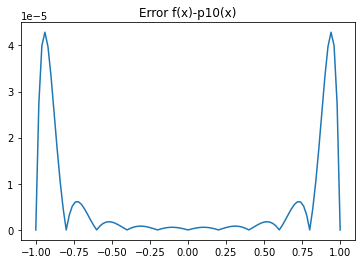

In [32]:
import math 
from numpy import zeros, exp, array, linspace
from matplotlib import pyplot as plt

# Q1 
# First compute divided difference
# INPUT: nodes, f evaluated at such nodes
# OUTPUT: coefficients c0 to cn
def divided_difference(node,f): 
    c=zeros(len(node)+1)
    for j in range(0, len(node)):
        c[j]=f[j]
    for k in range(1,len(node)+1):
        for j in reversed(range(k,len(node))):
            c[j]=(c[j]-c[j-1])/(node[j]-node[j-k])
    return c 

# Interpolation polynomial in Newton’s form
# INPUT: point x, nodes, f evaluated at such nodes
# OUTPUT: Interpolation polynomial at x
def newton(x,node,f):
    a=divided_difference(node,f)[len(node)-1]
    for j in reversed(range(0,len(node)-1)):
        a=divided_difference(node,f)[j]+(x-node[j])*a
    return a 

# Now we will test the code for the function x^2+2x-5
# INPUT f(1)=-2, f(2)=3, f(3)=10
# expected OUTPUT: f(4)=19
testnode=[1,2,3]
testf=[-2,3,10]
print('Test 1=',newton(4, testnode, testf))
# works, now lets try it to get f(5)=30
print('Test 2=',newton(5, testnode, testf))
# looks good

# Now we will define f(x)= xe^(-x^2)
def f(x):
    return x*exp(-x**2)

# Nodes for x in [-1,1]
xj=array([-1+j*(2/10) 
          for j in range(0,11)])
# Points
xj_=array([-1+j*(2/100) 
           for j in range(0,101)])
# Calculate error f(x)-p10(x) and plot
error=abs(f(xj_)-newton(xj_, xj, f(xj))) 

plt.plot(xj_,error)
plt.title('Error f(x)-p10(x)')
plt.show()


In [78]:
from numpy import arange
import matplotlib.pyplot as plt
import math
%matplotlib inline

# to test
coordinates=[(0.0,0.0),(1.0,1.0),(2.0,16.0)] # vectors x_j, y_j
test=[0,1,2,3]
testf=[]
for x in test:
    testf.append((x,exp(x)))

    
# Q4 and Q5
# Triadiaganol solver
# INPUT: list of 'coordinates', list whose elements are two values.
# First we calculate little a, b, c, d
def z_node_function(f_array): 
    n=len(f_array)
    a=[]
    b=[]
    c=[]
    d=[]
    for i in range(1,n-1):        
        a.append(2*( f_array[i+1][0]-f_array[i-1][0] ))
        d1= (f_array[i+1][1]-f_array[i][1])/(f_array[i+1][0]-f_array[i][0]) 
        d1= d1-(f_array[i][1]-f_array[i-1][1])/(f_array[i][0]-f_array[i-1][0])
        d.append(6*d1)
    for ii in range(1, n-2):
        b.append(f_array[ii+1][0]-f_array[ii][0])
        c.append(f_array[ii][0]-f_array[ii-1][0])
    n=len(a)       # Now we calculate our z nodes
    m=[a[0]]
    y=[d[0]]
    l=[]
    for j in range(n-1):
        l.append(c[j]/m[j])
        m.append(a[j+1]-l[j]*b[j])
    for k in range(1, n):
        y.append(d[k]-l[k-1]*y[k-1])
    z=[0]*(n)
    z[-1]=y[-1]/m[-1]
    for iii in range(n-2,-1,-1):
        z[iii]=((y[iii]-b[iii]*z[iii+1])/m[iii])
    
    z.insert(0,0.0)
    z.append(0.0)
    print(z)
    return z 

# OUTPUT: z nodes


# INPUT: our z nodes and our coordinates
# OUTPUT: A list whose elements are lists of A_j, B_j, C_j, D_j for each spline
def coefficients(z_nodes, f_array):
    n= len(z_nodes)
    A=[]
    B=[]
    C=[]
    D=[]
    for i in range(n-1): # Evaluate spline coefficients with z_j
                        # different set of coefficients for a different interval on the spline
        A.append((z_nodes[i+1]-z_nodes[i])/(6*(f_array[i+1][0]-f_array[i][0])))
        B.append((0.5)*z_nodes[i])
        C.append((1/(f_array[i+1][0]-f_array[i][0]))*(f_array[i+1][1]-f_array[i][1]) - 
            (1/6)*(f_array[i+1][0]-f_array[i][0])*(z_nodes[i+1]+2*z_nodes[i]))
        D.append(f_array[i][1])
    cof= [A,B,C,D]
    return cof

# Note:
# z= z_node_function(coordinates)
# c= coefficients(z, coordinates)

tz= z_node_function(testf)
ta= coefficients(tz, testf)


# INPUT: points X where spline is evaluated, f_array is our cooridinate nodes
# OUTPUT: a list of size X, helping plot
def s_j(X, f_array):
    z=z_node_function(f_array)
    ccof=coefficients(z, f_array)
    y=[]
    for x in X: 
        que= 0 # Note: this controls a lower bounds in a for loop later for checking
                # where the x value lies between which node
        if (x < f_array[0][0] or x > f_array[len(f_array)-1][0]):
            pass # Input values outside of our nodes are not evaluated
        else:
            for k in range(que, len(f_array)): # que changes through false if-statements, resets on each new x input
                if abs(x - f_array[k][0]) < 0.000001: # Check if input value is interpolation node
                    y.append(f_array[k][1])
                if x > f_array[k][0] and x < f_array[k+1][0]:
                    y.append(ccof[0][k]*(x-f_array[k][0])**3 
                        ccof[1][k]*(x-f_array[k][0])**2 
                        ccof[2][k]*(x-f_array[k][0]) 
                        ccof[3][k])
                else: que+= 1; # If our x is not within the bounds of x(j) and x(j+1) nodes, we increase the lower
                    # bounds to reevalute the input x at the next set of nodes x(j+1) and x(j+2)
    return y



prec_x= arange(0,3,0.03)
prec_f=[]
approx_f= s_j(prec_x, testf)
for jk in prec_x:
    prec_f.append(exp(jk))

plt.plot(prec_x, prec_f, '--', label='Exact')
plt.plot(prec_x, approx_f, '', label='Approximation')
plt.legend(loc='upper left')
plt.title('Spline S(x)')
plt.show()


SyntaxError: invalid syntax (Temp/ipykernel_21092/1764487944.py, line 97)

[0.0, 0.039320428702891375, 0.23179835421574355, 2.0972572196142436, -1.8071900908005378, 6.728424761331322, -1.0190512391169801, 0.2476361703205055, 0.0]
[0.0, 1.0743448551050194, -4.96085513931473, 0.04199952355248365, -0.6511897020468728, 2.8576565438941572, 1.1550304915607377, -0.5211854292129106, 0.0]
[0.0, 0.039320428702891375, 0.23179835421574355, 2.0972572196142436, -1.8071900908005378, 6.728424761331322, -1.0190512391169801, 0.2476361703205055, 0.0]
[0.0, 1.0743448551050194, -4.96085513931473, 0.04199952355248365, -0.6511897020468728, 2.8576565438941572, 1.1550304915607377, -0.5211854292129106, 0.0]


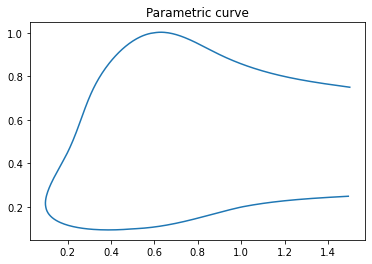

In [79]:
# Input given values
x_j= [(0,1.5) ,(0.618,0.9),(0.935,0.6),(1.255,0.35),(1.636,0.2) ,(1.905,0.1),(2.317,0.5),(2.827,1.0),(3.330,1.5)]
y_j= [(0,0.75),(0.618,0.9),(0.935,1.0),(1.255,0.8) ,(1.636,0.45),(1.905,0.2),(2.317,0.1),(2.827,0.2),(3.330,0.25)]

t_j_x= arange(0,3.33,2*0.00333)

x_z= z_node_function(x_j)
y_z= z_node_function(y_j)


x_cof= coefficients(x_z, x_j)
y_cof= coefficients(y_z, y_j)


x___s= s_j(t_j_x, x_j)
y___s= s_j(t_j_x, y_j)


plt.plot(x___s, y___s,)
plt.title('Parametric curve')
plt.show()

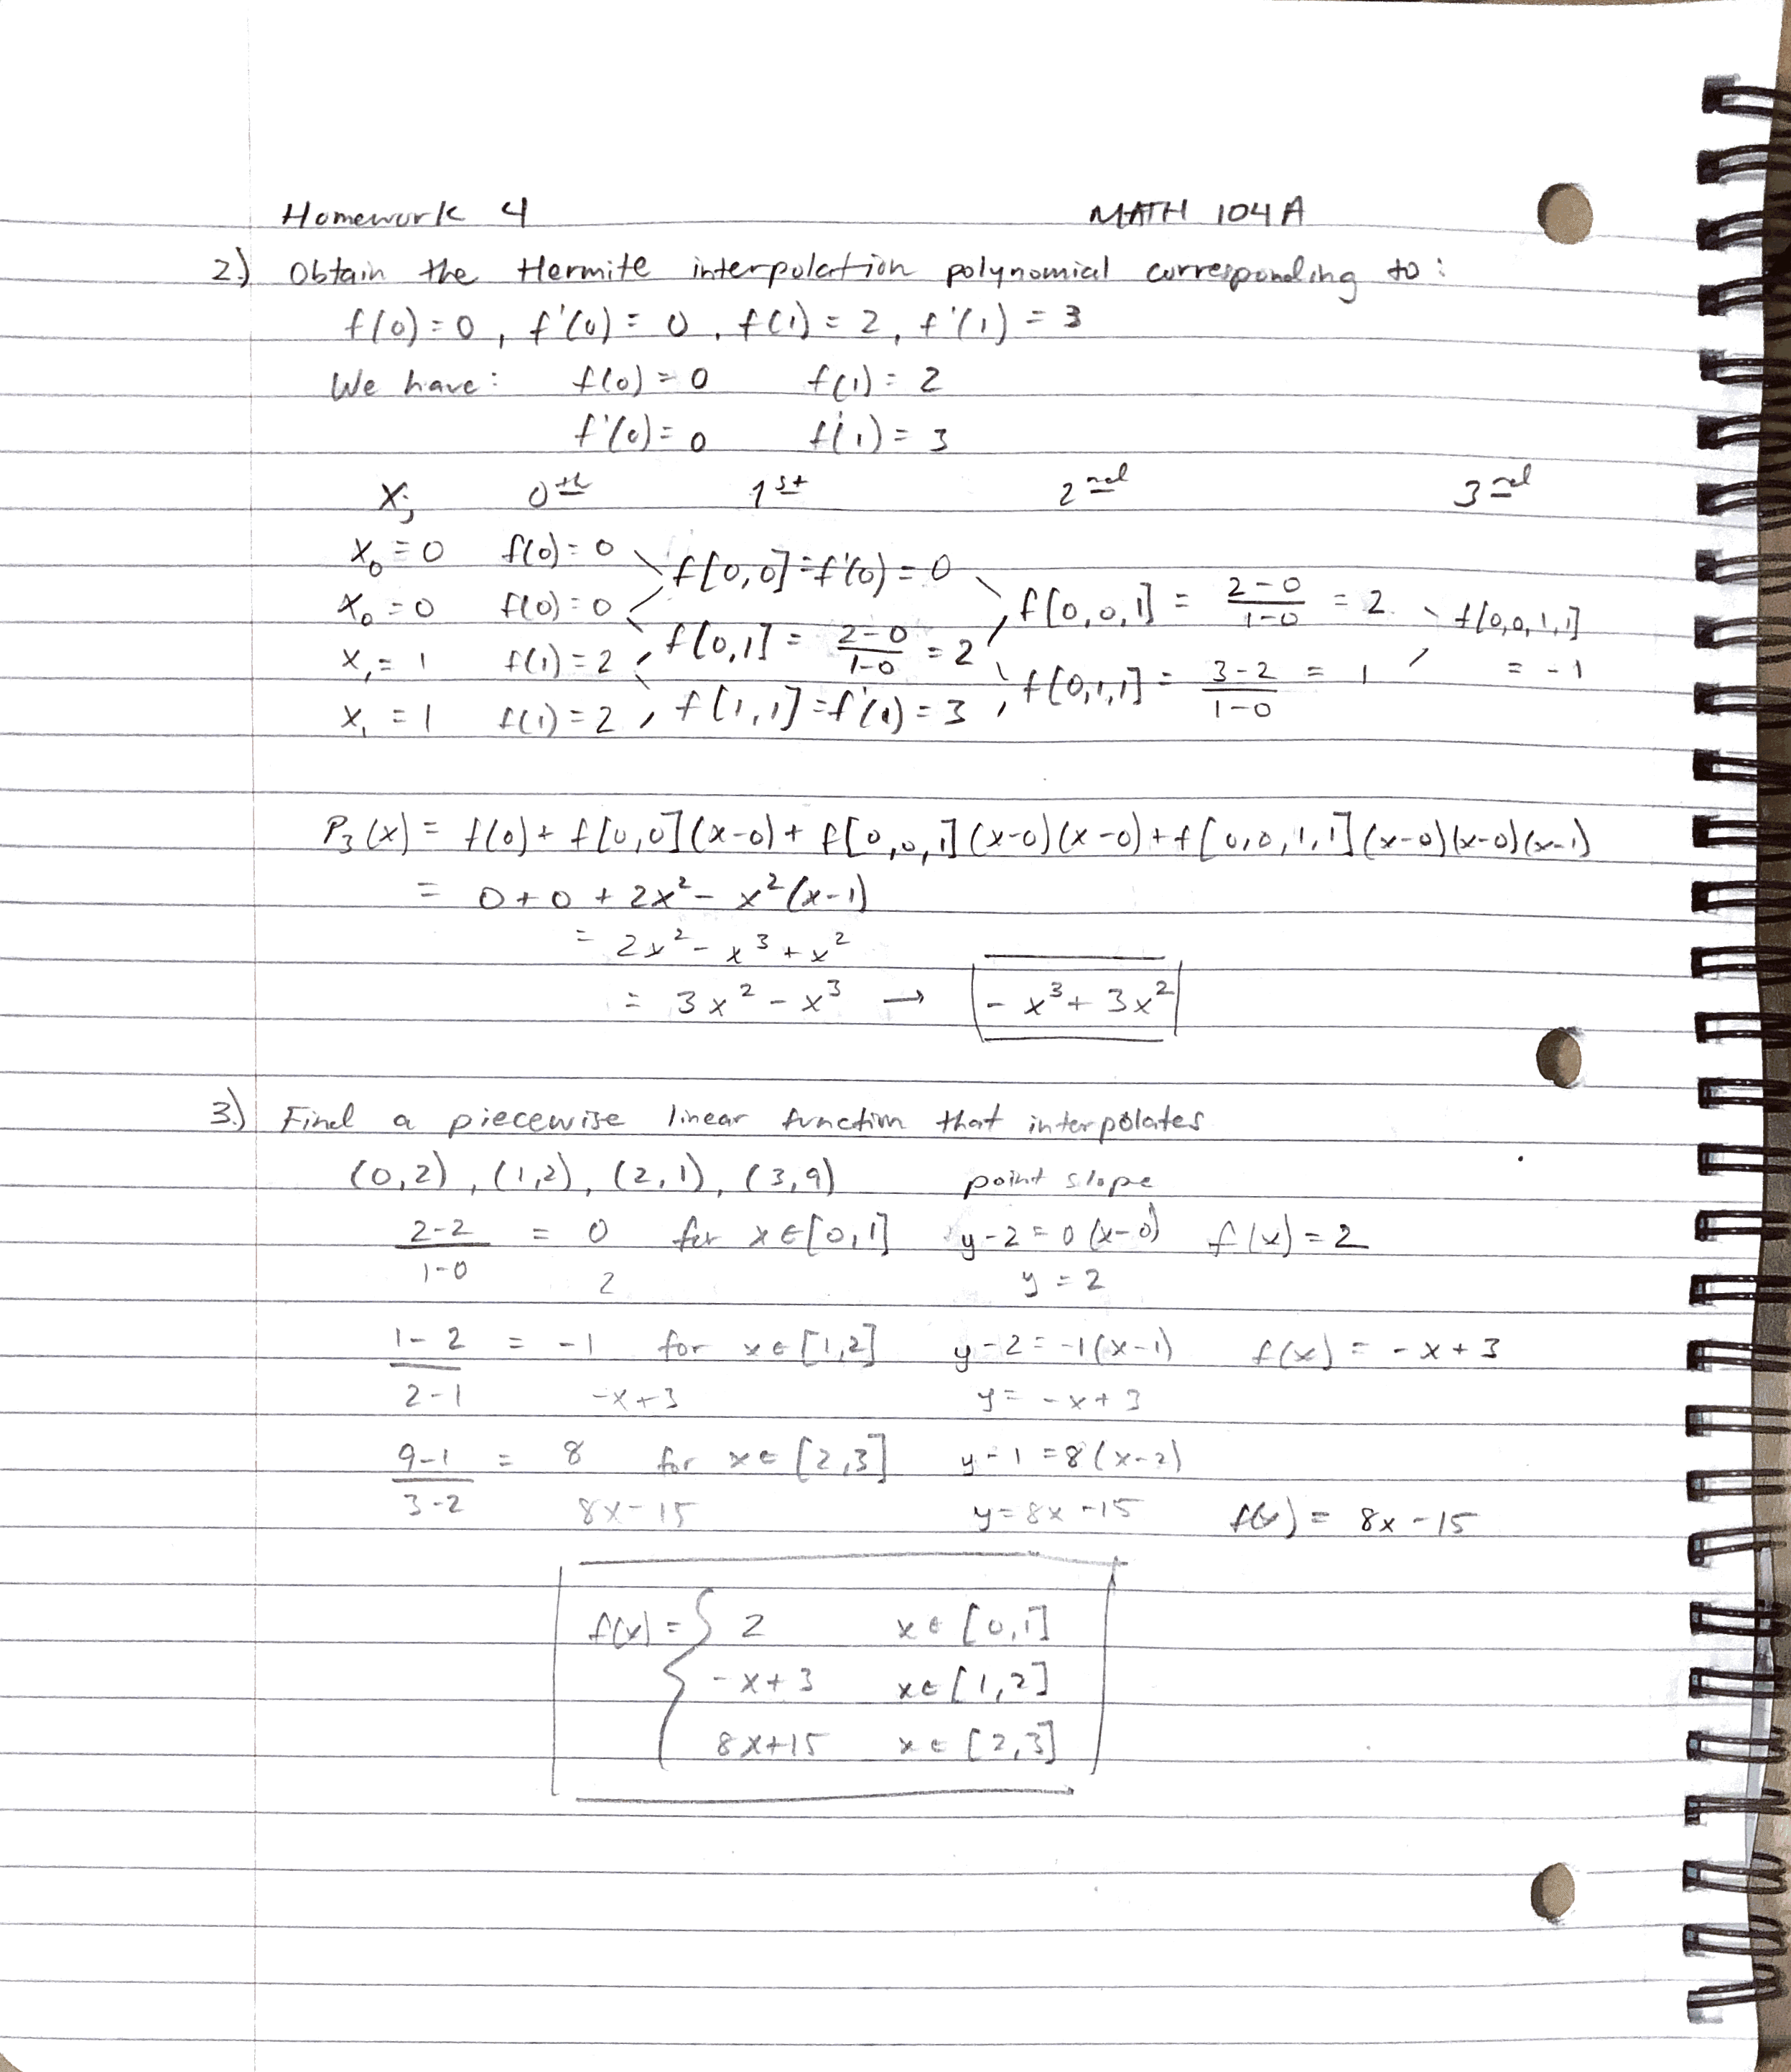